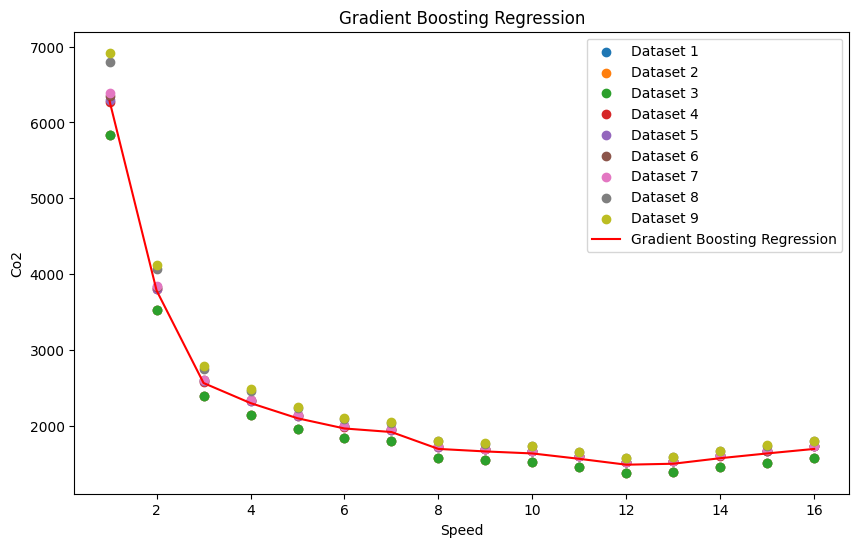

 Speed  Predicted Co2
     1    6278.828685
     2    3782.763766
     3    2562.953037
     4    2298.491518
     5    2098.276152
     6    1963.509342
     7    1916.727245
     8    1693.952076
     9    1660.673181
    10    1634.296290
    11    1563.178624
    12    1485.785839
    13    1498.504798
    14    1571.707079
    15    1634.443878
    16    1693.729618


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor

# Assuming you have a list of Excel file paths
file_paths = [f"file{i}.xlsx" for i in range(1, 10)]
rates_datasets = []

# Read datasets from Excel files and assuming 'Co2' column for rates
for file_path in file_paths:
    df = pd.read_excel(file_path)
    rates_datasets.append(df['Co2'].values)

# Define the data for all datasets
num_speed_points = 16
speed = np.array([i for i in range(1, num_speed_points + 1)]).reshape(-1, 1)

# Combine data from all datasets
all_speed = np.concatenate([speed] * len(rates_datasets))
all_rates = np.concatenate(rates_datasets)

# Create and fit the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100)
gb_model.fit(all_speed, all_rates)

# Predict using the model
gb_predictions = gb_model.predict(all_speed)

# Plot the results
plt.figure(figsize=(10, 6))
for i, rates_dataset in enumerate(rates_datasets):
    plt.scatter(speed, rates_dataset, label=f'Dataset {i+1}')
plt.plot(speed, gb_model.predict(speed), color='red', label='Gradient Boosting Regression')
plt.title('Gradient Boosting Regression')
plt.xlabel('Speed')
plt.ylabel('Co2')
plt.legend()
plt.show()

# Predict CO2 values for speed using the model and create a DataFrame with the predictions
predicted_co2_values = gb_model.predict(speed)
predicted_df = pd.DataFrame({
    'Speed': speed.flatten(),
    'Predicted Co2': predicted_co2_values.flatten()
})

# Print the DataFrame
print(predicted_df.to_string(index=False))
